# Figure 4
##### g.marechal (Toulouse, August 2025)

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from src import *

In [10]:
pol = 'cyclonic'
path_data = '../data/' + pol + "/"
path_output = '../figures/'

### Load data

In [7]:
suffix = '.nc'

# Mean Square Slope
compo_mss_full_swell = xr.open_dataset(path_data + 'composite_mss_module_swell_full' + suffix)
compo_mss_full_windsea = xr.open_dataset(path_data + 'composite_mss_module_windsea_full' + suffix)
compo_mss_noow_swell = xr.open_dataset(path_data + 'composite_mss_module_swell_noow' + suffix)
compo_mss_noow_windsea = xr.open_dataset(path_data + 'composite_mss_module_windsea_noow' + suffix)

compo_mss_full_swell = compo_mss_full_swell['composite_swell']
compo_mss_full_windsea = compo_mss_full_windsea['composite_windsea']
compo_mss_noow_swell = compo_mss_noow_swell['composite_swell']
compo_mss_noow_windsea = compo_mss_noow_windsea['composite_windsea']

# Significant Wave Height
suffix = '.nc'
compo_hs_full_swell = xr.open_dataset(path_data + 'composite_hs_swell_full' + suffix)
compo_hs_full_windsea = xr.open_dataset(path_data + 'composite_hs_windsea_full' + suffix)
compo_hs_noow_swell = xr.open_dataset(path_data + 'composite_hs_swell_noow' + suffix)
compo_hs_noow_windsea = xr.open_dataset(path_data + 'composite_hs_windsea_noow' + suffix)

compo_hs_full_swell = compo_hs_full_swell['composite_swell']
compo_hs_full_windsea = compo_hs_full_windsea['composite_windsea']
compo_hs_noow_swell = compo_hs_noow_swell['composite_swell']
compo_hs_noow_windsea = compo_hs_noow_windsea['composite_windsea']

data_swell_hs_full = xr.open_dataset(path_data + 'composite_hs_swell_full.nc') # to help the understanding of the main panel

### Perform the radial average

In [11]:
# --- Significant Wave Height
radial_axis, profile_hs_full_swell = radial_average(abs(compo_hs_full_swell.values.T))
_, profile_hs_full_windsea = radial_average(abs(compo_hs_full_windsea.values.T))
_, profile_hs_noow_swell = radial_average(abs(compo_hs_noow_swell.values.T))
_, profile_hs_noow_windsea = radial_average(abs(compo_hs_noow_windsea.values.T))

# --- Mean Square Slope
radial_axis, profile_mss_full_swell = radial_average(abs(compo_mss_full_swell.values.T))
_, profile_mss_full_windsea = radial_average(abs(compo_mss_full_windsea.values.T))
_, profile_mss_noow_swell = radial_average(abs(compo_mss_noow_swell.values.T))
_, profile_mss_noow_windsea = radial_average(abs(compo_mss_noow_windsea.values.T))


In [9]:
theta = np.linspace(0, 2*np.pi, 100)

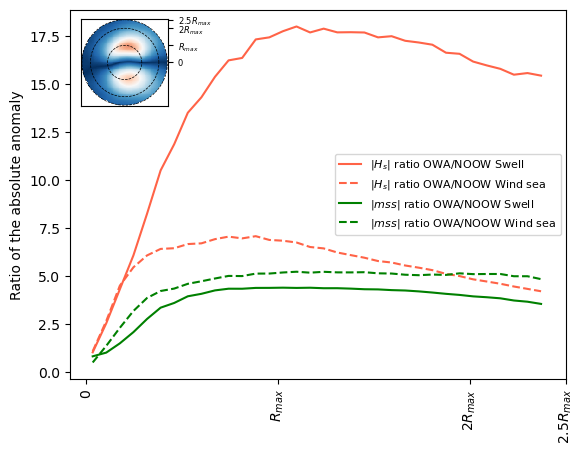

In [14]:
# x_axis = np.linspace(0, 1, len(radial_axis))
indice_no_nan = -16
fig, ax = plt.subplots()
ax.plot(radial_axis[:indice_no_nan], profile_hs_full_swell[:indice_no_nan]/profile_hs_noow_swell[:indice_no_nan], label = '$|H_s|$ ratio OWA/NOOW Swell', color = 'tomato')
ax.plot(radial_axis[:indice_no_nan], profile_hs_full_windsea[:indice_no_nan]/profile_hs_noow_windsea[:indice_no_nan], label = '$|H_s|$ ratio OWA/NOOW Wind sea', color = 'tomato', linestyle = '--')
ax.plot(radial_axis[:indice_no_nan], profile_mss_full_swell[:indice_no_nan]/profile_mss_noow_swell[:indice_no_nan], label = '$|mss|$ ratio OWA/NOOW Swell', color = 'green')
ax.plot(radial_axis[:indice_no_nan], profile_mss_full_windsea[:indice_no_nan]/profile_mss_noow_windsea[:indice_no_nan], label = '$|mss|$ ratio OWA/NOOW Wind sea', color = 'green', linestyle = '--')

ax.set_ylabel('Ratio of the absolute anomaly')

# ax.set_xticks([0, .2, 1], ['0', '$R_{max}$', '2.5$R_{max}$'], rotation = 90)
ax.set_xticks([0, .4, .8, 1.], ['0', '$R_{max}$', '2$R_{max}$', '2.5$R_{max}$'], rotation = 90)
ax.legend(fontsize = 8)

ax_inset = fig.add_axes([.12, .68, .18, .18])
(abs(data_swell_hs_full['composite_swell'])).plot(ax = ax_inset, add_colorbar = False, vmin = 0, vmax = .04, cmap = 'RdBu_r')
ax_inset.plot(np.cos(theta), np.sin(theta), color = 'k', linestyle = '--', linewidth = .5)
ax_inset.plot(np.cos(theta)*.8, np.sin(theta)*.8, color = 'k', linestyle = '--', linewidth = .5)
ax_inset.plot(np.cos(theta)*.4, np.sin(theta)*.4, color = 'k', linestyle = '--', linewidth = .5)
# ax_inset.plot(np.cos(theta)*., np.sin(theta)*.8)

ax_inset.xaxis.set_visible(False)
# ax_inset.yaxis.set_visible(False)
ax_inset.set_ylabel('')
ax_inset.set_ylabel('')
ax_inset.yaxis.tick_right()
ax_inset.set_yticks([0, .4, .8, 1.], ['0', '$R_{max}$', '2$R_{max}$', '2.5$R_{max}$'], rotation = 0, fontsize = 6)

ax_inset.set_aspect('equal', 'box')
plt.savefig(path_output + 'Fig4.png', dpi = 300, bbox_inches = 'tight')
